In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# 0. gensim 설치
( 이 부분은 한번만 하면 되기 때문에 다른 사람들은 넘어가주세용 )

In [ ]:
cd /content/drive/Shareddrives/capstone/Elegant_Friends/clustering

/content/drive/Shareddrives/capstone/Elegant_Friends/clustering


In [ ]:
ls

 clustering_seokwon.ipynb     clustering_somi.ipynb           mecab/
 clustering_seoyun.ipynb     'clustering_somi.ipynb의 사본'   rsc/
 clustering_seungyoon.ipynb   gensim/


In [ ]:
!git clone https://github.com/RaRe-Technologies/gensim.git

Cloning into 'gensim'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 30269 (delta 89), reused 111 (delta 60), pack-reused 30091
Receiving objects: 100% (30269/30269), 101.74 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (21185/21185), done.
Checking out files: 100% (816/816), done.


In [ ]:
ls

gensim/


#1-1. 치환 단어 생성

In [ ]:
substitution = {
    '티월드' : ['t월드', 'T월드'],
    '다람쥐' : ['4G', '3G', '2G', '5G', '삼지', '투지', '투쥐', '삼쥐', '3G통화'],   # 다람쥐 -> 3G/4G/5G
    '코알라' : ['LG U+', 'LGU+', 'U+', "엘지유플러스",'유플러스', "U플러스", '유플'], 
    '병아리' : ['SKT', 'SK', "에스케이티", "에스케이"],                            
    '케이티' : ['KT올레','올레', 'KT'],
    '엘지' : ['엘쥐', '앨쥐', '앨지', '헬지', '헬쥐', "LG"],
    '인터페이스' : ['UI', 'UX'],
    '엘티이' : ['LTE'],
    '미니' : ['U+MINI', 'MINI'],
    '옵티머스' : ['옵엘투', '옵Q'],
    '갤럭시' : ['갤럭시S2', '갤노트2', '노트2', '갤노트', '겔럭시', '겔러시', '겔유', '갤유', '갤S20', '겔'],
    '도돌' : ['도돌폰'],
    '와이파이' : ['와파'],
    '엘지텔레콤' : ['LG텔레콤'],
    '업데이트' : ["업뎃", '업댓', '업그레이드'],
    '로그인' : ['로긴'],
    '앱' : ['어플리케이션', '애플리케이션', "어플"],
    '멤버십' : ["맴버쉽", "맴버십", '멤버쉽'],
    '아이핀' : ['IPIN'],
    '고객센터' : ["콜센터", '서비스센터'],
    '오류' : ['에러'],
    '늑대' : ['악성코드', '악성'],                                                # 늑대 -> 악성 코드 오류
    '댓글' : ['댓', '답글'],
    '판다' : ["VVIP", "VIP"],                                                     # 판다 -> VIP
    '다운그레이드' : ['다운데이트'],
    '상태바' : ['상태줄'],
    '본인인증' : ['본인 인증'],
    '사용량' : ['잔여사용량', '잔여량', '잔여'],
    '자급제' : ['자급제폰'],
    '비밀번호': ['비번'],
    '개인정보' : ['개인 정보']
}

#### 사용자 사전에 추가해야할 단어
엘티이, 도돌, 젤리빈, 고객센터, 해외로밍, 부가서비스, 다운그레이드, 하루종일, 본인인증, 플레이스토어, 원스토어, 비밀번호, 주민번호, 인증번호, 상태바, 티월드

In [ ]:
cd /content/drive/Shareddrives/capstone/Elegant_Friends/clustering/rsc/service_center_data/

/content/drive/Shareddrives/capstone/Elegant_Friends/clustering/rsc/service_center_data


In [ ]:
import json

with open('substitution_dict.txt', 'w') as file:
  file.write(json.dumps(substitution))

#1-2. 분기별 데이터 불러오기

In [3]:
import json

with open('/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/clustering_data/service_center/substitution_dict.txt', 'r') as file:
  substitution = json.load(file)

In [4]:
substitution

{'개인정보': ['개인 정보'],
 '갤럭시': ['갤럭시S2', '갤노트2', '노트2', '갤노트', '겔럭시', '겔러시', '겔유', '갤유', '갤S20', '겔'],
 '고객센터': ['콜센터', '서비스센터'],
 '늑대': ['악성코드', '악성'],
 '다람쥐': ['4G', '3G', '2G', '5G', '삼지', '투지', '투쥐', '삼쥐', '3G통화'],
 '다운그레이드': ['다운데이트'],
 '댓글': ['댓', '답글'],
 '도돌': ['도돌폰'],
 '로그인': ['로긴'],
 '멤버십': ['맴버쉽', '맴버십', '멤버쉽'],
 '미니': ['U+MINI', 'MINI'],
 '병아리': ['SKT', 'SK', '에스케이티', '에스케이'],
 '본인인증': ['본인 인증'],
 '비밀번호': ['비번'],
 '사용량': ['잔여사용량', '잔여량', '잔여'],
 '상태바': ['상태줄'],
 '아이핀': ['IPIN'],
 '앱': ['어플리케이션', '애플리케이션', '어플'],
 '업데이트': ['업뎃', '업댓', '업그레이드'],
 '엘지': ['엘쥐', '앨쥐', '앨지', '헬지', '헬쥐', 'LG'],
 '엘지텔레콤': ['LG텔레콤'],
 '엘티이': ['LTE'],
 '오류': ['에러'],
 '옵티머스': ['옵엘투', '옵Q'],
 '와이파이': ['와파'],
 '인터페이스': ['UI', 'UX'],
 '자급제': ['자급제폰'],
 '케이티': ['KT올레', '올레', 'KT'],
 '코알라': ['LG U+', 'LGU+', 'U+', '엘지유플러스', '유플러스', 'U플러스', '유플'],
 '티월드': ['t월드', 'T월드'],
 '판다': ['VVIP', 'VIP']}

In [ ]:
cd /content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/txt/

/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/txt


In [6]:
import pandas as pd
import numpy as np

for year in range(2020, 2021):
  for month in range(4, 5):
    if year == 2021 and month >= 2:
      break

    fname = str(year)+'_'+str(month)
    df = pd.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/tsv/'+fname+'.tsv')

    df['text'] = df['text'].str.upper()

    negative = df[df.label==0]

    print('긍정 및 중립 개수:', len(df))
    print('부정 개수:', len(negative))

    for key in substitution:
      for word in substitution[key]:
        negative['text'] = negative['text'].str.replace(word, key)

    #negative['text'].to_csv(fname+'.txt', index=False)

negative[:30]

긍정 및 중립 개수: 894
부정 개수: 487


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,text,label
407,2020년 12월 29일,최악의 앱입니다. 나름 대한민국 3대 메이저 통신사임에도 불구하고 알뜰폰 고객센터 ...,0
408,2020년 12월 13일,최근에 끊김현상이 너무심함.. 몇년동안 그냥그냥 썼는데.. 최근들어 라디오앱이 자꾸...,0
409,2020년 12월 23일,앱이 멍청해요. 회원가입하라해서 했는데 사용자 정보가 없다고 뜨고 심심하면 브라우저...,0
410,2020년 12월 15일,인터넷도 잘 되고 통화도 잘되는데 고객센터 앱 실행 후 생년월일 치고. 로그인 버튼...,0
411,2020년 12월 22일,선생님들 로그인을 하는데 서비스이용이원할하지않습니다.이렇게뜨고 접속자가 많다고 안들...,0
412,2020년 11월 26일,"아니, 선결제하고 내가 뭐했는지 확인하려고 자세히 보기 누르면 서비스가 원활하지 않...",0
413,2020년 12월 10일,통신사 앱이 이렇게 불안정한데 통신망은 괜찮을까? 의문이 생기게 만드는 앱. 앱이 ...,0
414,2020년 12월 30일,"계속 자동 종료됩니다, 지우고 깔고를 십회이상 반복했는데 저만 있는 증상 이 아닌듯...",0
415,2020년 12월 29일,별하나 주기도 아깝네요 앱깔고 제대로 확인한건 손가락으로 꼽을정도.. 뭔놈에 앱이 ...,0
416,2020년 11월 13일,업데이트는 세월아네월아걸리고 되지도 않는데 자꾸 업데이트하라고 떠서 정작 필요할때 ...,0


In [ ]:
ls /content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/txt/

2011_1.txt  2012_4.txt  2014_3.txt  2016_2.txt  2018_1.txt  2019_4.txt
2011_2.txt  2013_1.txt  2014_4.txt  2016_3.txt  2018_2.txt  2020_1.txt
2011_3.txt  2013_2.txt  2015_1.txt  2016_4.txt  2018_3.txt  2020_2.txt
2011_4.txt  2013_3.txt  2015_2.txt  2017_1.txt  2018_4.txt  2020_3.txt
2012_1.txt  2013_4.txt  2015_3.txt  2017_2.txt  2019_1.txt  2020_4.txt
2012_2.txt  2014_1.txt  2015_4.txt  2017_3.txt  2019_2.txt  2021_1.txt
2012_3.txt  2014_2.txt  2016_1.txt  2017_4.txt  2019_3.txt


###pf) 분기나누기

In [ ]:
from datetime import datetime

# datetime 형식으로 변환
date = df['date']
date = pd.to_datetime(date, format='%Y년 %m월 %d일')
df['date'] = date

# 날짜별로 정렬 (오름차순)
df.sort_values(by=['date'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df[:10]

In [ ]:
one = df[df.date.dt.month<=3]
one['분기'] = one.date.dt.year.str + '년 1분기'
one

In [ ]:
year = one.date.dt.strftime('%Y') + '년 1분기'
year

In [ ]:
cd /content/drive/Shareddrives/capstone/Elegant_Friends/clustering/rsc/service_center_data/

/content/drive/Shareddrives/capstone/Elegant_Friends/clustering/rsc/service_center_data


In [ ]:
df['text'].to_csv('service_sub.txt', index=False)

#2-1. Mecab 설치

In [ ]:
cd /content/drive/Shareddrives/capstone/Elegant_Friends/clustering/mecab/Mecab-ko-for-Google-Colab/

/content/drive/Shareddrives/capstone/Elegant_Friends/clustering/mecab/Mecab-ko-for-Google-Colab


In [ ]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh  service_sub.txt


In [ ]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 49.4MB/s 
     |████████████████████████████████| 92kB 7.7MB/s 
     |████████████████████████████████| 460kB 38.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-05-16 06:58:49--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=XqqNKt6t6ZHG%2FgOLL4LbkgY%2Boa8%3D&Expires=1621149867&AWSAccessKeyId=AKIA6KOSE

#2-2. 사용자 사전 추가하기

In [ ]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [ ]:
ls

aclocal.m4      EF.csv       MAJ.csv      NorthKorea.csv     tools/
AUTHORS         EP.csv       Makefile     NP.csv             unk.def
autogen.sh*     ETM.csv      Makefile.am  NR.csv             unk.dic
ChangeLog       ETN.csv      Makefile.in  Person-actor.csv   user-dic/
char.bin        feature.def  matrix.bin   Person.csv         VA.csv
char.def        Foreign.csv  matrix.def   Place-address.csv  VCN.csv
clean*          Group.csv    missing*     Place.csv          VCP.csv
CoinedWord.csv  Hanja.csv    MM.csv       Place-station.csv  VV.csv
config.log      IC.csv       model.bin    pos-id.def         VX.csv
config.status*  Inflect.csv  model.def    Preanalysis.csv    Wikipedia.csv
configure*      INSTALL      NEWS         README             XPN.csv
configure.ac    install-sh*  NNBC.csv     rewrite.def        XR.csv
COPYING         J.csv        NNB.csv      right-id.def       XSA.csv
dicrc           left-id.def  NNG.csv      Symbol.csv         XSN.csv
EC.csv          MAG.csv      NN

In [ ]:
ls user-dic/

nnp.csv  person.csv  place.csv  README.md


In [ ]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
  file_data = f.readlines()

In [ ]:
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n', '구글,,,,NNP,*,T,구글,*,*,*,*,*\n']

In [ ]:
word_list = ['엘티이', '도돌', '젤리빈', '고객센터', '해외로밍', '부가서비스', '다운그레이드', '하루종일', '장기고객', 
             '본인인증', '플레이스토어', '원스토어', '비밀번호', '주민번호', '인증번호','상태바', '티월드', '자급제']

In [ ]:
!pip install jamo

In [ ]:
from jamo import h2j, j2hcj 

def get_jongsung_TF(sample_text): 
  sample_text_list = list(sample_text) 
  last_word = sample_text_list[-1] 
  last_word_jamo_list = list(j2hcj(h2j(last_word))) 
  last_jamo = last_word_jamo_list[-1] 

  jongsung_TF = "T" 
  if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']: 
    jongsung_TF = "F" 
  
  return jongsung_TF

In [ ]:
for word in word_list: 
  jongsung_TF = get_jongsung_TF(word) 

  line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word) 

  file_data.append(line)

In [ ]:
word='개인정보'
jongsung_TF = get_jongsung_TF(word) 
line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word) 

file_data.append(line)

In [ ]:
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '엘티이,,,,NNP,*,F,엘티이,*,*,*,*,*\n',
 '도돌,,,,NNP,*,T,도돌,*,*,*,*,*\n',
 '젤리빈,,,,NNP,*,T,젤리빈,*,*,*,*,*\n',
 '고객센터,,,,NNP,*,F,고객센터,*,*,*,*,*\n',
 '해외로밍,,,,NNP,*,T,해외로밍,*,*,*,*,*\n',
 '부가서비스,,,,NNP,*,F,부가서비스,*,*,*,*,*\n',
 '다운그레이드,,,,NNP,*,F,다운그레이드,*,*,*,*,*\n',
 '하루종일,,,,NNP,*,T,하루종일,*,*,*,*,*\n',
 '장기고객,,,,NNP,*,T,장기고객,*,*,*,*,*\n',
 '본인인증,,,,NNP,*,T,본인인증,*,*,*,*,*\n',
 '플레이스토어,,,,NNP,*,F,플레이스토어,*,*,*,*,*\n',
 '원스토어,,,,NNP,*,F,원스토어,*,*,*,*,*\n',
 '비밀번호,,,,NNP,*,F,비밀번호,*,*,*,*,*\n',
 '주민번호,,,,NNP,*,F,주민번호,*,*,*,*,*\n',
 '인증번호,,,,NNP,*,F,인증번호,*,*,*,*,*\n',
 '상태바,,,,NNP,*,F,상태바,*,*,*,*,*\n',
 '티월드,,,,NNP,*,F,티월드,*,*,*,*,*\n',
 '자급제,,,,NNP,*,T,자급제,*,*,*,*,*\n']

In [ ]:
with open("./user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
  for line in file_data: 
    f.write(line)

In [ ]:
ls tools/

add-userdic.sh*  convert_for_using_store.sh*  mecab-bestn.sh*


In [ ]:
!bash ./tools/add-userdic.sh

generating userdic...
nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./MAG.csv ... 14242
reading ./VCN.csv ... 7
reading ./VCP.csv ... 9
reading ./VA.csv ... 2360


In [ ]:
!make install

make[1]: Entering directory '/content/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/content/mecab-ko-dic-2.1.1-20180720'


#2-2. 사용자 사전에 단어 우선순위 조정하기

In [ ]:
ls

aclocal.m4      EP.csv       Makefile.am     Person-actor.csv   user-nnp.csv
AUTHORS         ETM.csv      Makefile.in     Person.csv         user-person.csv
autogen.sh*     ETN.csv      matrix.bin      Place-address.csv  user-place.csv
ChangeLog       feature.def  matrix.def      Place.csv          VA.csv
char.bin        Foreign.csv  missing*        Place-station.csv  VCN.csv
char.def        Group.csv    MM.csv          pos-id.def         VCP.csv
clean*          Hanja.csv    model.bin       Preanalysis.csv    VV.csv
CoinedWord.csv  IC.csv       model.def       README             VX.csv
config.log      Inflect.csv  NEWS            rewrite.def        Wikipedia.csv
config.status*  INSTALL      NNBC.csv        right-id.def       XPN.csv
configure*      install-sh*  NNB.csv         Symbol.csv         XR.csv
configure.ac    J.csv        NNG.csv         sys.dic            XSA.csv
COPYING         left-id.def  NNP.csv         tools/             XSN.csv
dicrc           MAG.csv      NorthKorea.cs

In [ ]:
with open("./user-nnp.csv", 'r', encoding='utf-8') as f: 
  file_data = f.readlines()

In [ ]:
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '엘티이,1786,3545,2953,NNP,*,F,엘티이,*,*,*,*,*\n',
 '도돌,1786,3546,2953,NNP,*,T,도돌,*,*,*,*,*\n',
 '젤리빈,1786,3546,2953,NNP,*,T,젤리빈,*,*,*,*,*\n',
 '고객센터,1786,3545,2953,NNP,*,F,고객센터,*,*,*,*,*\n',
 '해외로밍,1786,3546,2953,NNP,*,T,해외로밍,*,*,*,*,*\n',
 '부가서비스,1786,3545,2953,NNP,*,F,부가서비스,*,*,*,*,*\n',
 '다운그레이드,1786,3545,2953,NNP,*,F,다운그레이드,*,*,*,*,*\n',
 '하루종일,1786,3546,2953,NNP,*,T,하루종일,*,*,*,*,*\n',
 '장기고객,1786,3546,2953,NNP,*,T,장기고객,*,*,*,*,*\n',
 '본인인증,1786,3546,2953,NNP,*,T,본인인증,*,*,*,*,*\n',
 '플레이스토어,1786,3545,2953,NNP,*,F,플레이스토어,*,*,*,*,*\n',
 '원스토어,1786,3545,2953,NNP,*,F,원스토어,*,*,*,*,*\n',
 '비밀번호,1786,3545,2953,NNP,*,F,비밀번호,*,*,*,*,*\n',
 '주민번호,1786,3545,2953,NNP,*,F,주민번호,*,*,*,*,*\n',
 '인증번호,1786,3545,2953,NNP,*,F,인증번호,*,*,*,*,*\n',
 '상태바,1786,3545,2953,NNP,*,F,상태바,*,*,*,*,*\n',
 '티월드,1786,3545,2953,NNP,*,F,티월드,*,*,*,*,*\n',
 '자급제,1786,3546,2953,NNP,*,T,자급제,*,*,*,*,*\n']

In [ ]:
for i in range(len(file_data)):
  lst = file_data[i].split(',')
  lst[3] = '0'  # 우선 순위를 0번째로 부여
  file_data[i] = ",".join(lst)

In [ ]:
file_data

['대우,1786,3545,0,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,0,NNP,*,T,구글,*,*,*,*,*\n',
 '엘티이,1786,3545,0,NNP,*,F,엘티이,*,*,*,*,*\n',
 '도돌,1786,3546,0,NNP,*,T,도돌,*,*,*,*,*\n',
 '젤리빈,1786,3546,0,NNP,*,T,젤리빈,*,*,*,*,*\n',
 '고객센터,1786,3545,0,NNP,*,F,고객센터,*,*,*,*,*\n',
 '해외로밍,1786,3546,0,NNP,*,T,해외로밍,*,*,*,*,*\n',
 '부가서비스,1786,3545,0,NNP,*,F,부가서비스,*,*,*,*,*\n',
 '다운그레이드,1786,3545,0,NNP,*,F,다운그레이드,*,*,*,*,*\n',
 '하루종일,1786,3546,0,NNP,*,T,하루종일,*,*,*,*,*\n',
 '장기고객,1786,3546,0,NNP,*,T,장기고객,*,*,*,*,*\n',
 '본인인증,1786,3546,0,NNP,*,T,본인인증,*,*,*,*,*\n',
 '플레이스토어,1786,3545,0,NNP,*,F,플레이스토어,*,*,*,*,*\n',
 '원스토어,1786,3545,0,NNP,*,F,원스토어,*,*,*,*,*\n',
 '비밀번호,1786,3545,0,NNP,*,F,비밀번호,*,*,*,*,*\n',
 '주민번호,1786,3545,0,NNP,*,F,주민번호,*,*,*,*,*\n',
 '인증번호,1786,3545,0,NNP,*,F,인증번호,*,*,*,*,*\n',
 '상태바,1786,3545,0,NNP,*,F,상태바,*,*,*,*,*\n',
 '티월드,1786,3545,0,NNP,*,F,티월드,*,*,*,*,*\n',
 '자급제,1786,3546,0,NNP,*,T,자급제,*,*,*,*,*\n']

In [ ]:
with open("./user-nnp.csv", 'w', encoding='utf-8') as f: 
  for line in file_data: 
    f.write(line)

In [ ]:
!make clean

test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic


In [ ]:
!make install

/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./MAG.csv ... 14242
reading ./VCN.csv ... 7
reading ./VCP.csv ... 9
reading ./VA.csv ... 2360
reading ./user-nnp.csv ... 20
reading ./EP.csv ... 51
reading ./user-person.csv ... 1
reading ./Place.csv ... 30303
reading ./Hanja.csv ... 125750
reading ./XSN.csv ... 124
reading ./NNG.csv ... 208524
reading ./CoinedWord.csv ... 148
reading ./NNB.csv ... 140
reading ./NP.csv ... 342
reading ./XSA.csv ... 19
reading ./EC.csv ... 2547
reading ./NNBC.csv ... 677
reading ./VX.csv ... 125
reading ./Preanalysis.csv ... 5
reading ./EF.csv ... 1820
reading ./MM.csv ... 453
reading ./user-place.csv ... 2
reading ./XPN.csv ... 83
reading ./Symbol.csv ... 16
reading ./Inflect.csv ... 44820
reading ./Foreign.csv ... 11690
reading ./IC.csv ... 1305
reading ./Place-address.csv ... 19301
reading ./XSV.csv ... 23
reading ./NR.csv ..

In [ ]:
print(mecab.nouns('주민번호'))  # 주민번호 이어서 출력하면 잘된 것!
print(mecab.nouns('비밀번호'))
print(mecab.nouns('인증번호'))

['주민번호']
['비밀번호']
['인증번호']


##2-3. Tokenizing 하기

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()

In [ ]:
mecab.nouns('장기고객')

['장기고객']

f -> tokenizing 할 파일 불러오기    
f2 -> tokenizing 한 후 다시 파일로 저장

In [ ]:
for year in range(2018, 2019):
  for month in range(1, 2):
    if year == 2021 and month >= 2:
      break

    fname = str(year)+'_'+str(month)
    f = open('/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/txt/'+fname+'.txt', 'r')
    f2 = open('/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/tokenized_data/'+'tokenizing_'+fname+'.txt', 'w')

    lines = f.readlines()[1:]
    print(year, month, len(lines))

    for line in lines:
      nouns = mecab.nouns(line)
      f2.write(" ".join(nouns) + '\n')

    f.close()
    f2.close()

2018 1 196


#3-1. Gensim 사용하여 딕셔너리 만들기

In [ ]:
class Documents:
    def __init__(self, path):
        self.path = path
    def __iter__(self):
        with open(self.path, encoding='utf-8') as f:
            for doc in f:
                yield doc.strip().split()

In [ ]:
corpus_path = '/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/tokenized_data/tokenizing_2011_1.txt'
documents = Documents(corpus_path)

In [ ]:
import gensim

dictionary = gensim.corpora.Dictionary(documents)
print('dictionary size : %d' % len(dictionary))

2021-05-12 14:22:25,073 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-12 14:22:25,082 : INFO : built Dictionary(326 unique tokens: ['글', '댓글', '때', '로그인', '아래']...) from 131 documents (total 742 corpus positions)


dictionary size : 326


In [ ]:
from collections import Counter

min_count = 3
word_counter = Counter((word for words in documents for word in words))
removal_word_idxs = {
    dictionary.token2id[word] for word, count in word_counter.items() if count < min_count
}

dictionary.filter_tokens(removal_word_idxs)
dictionary.compactify()
print('dictionary size : %d' % len(dictionary)) # dictionary size : 403

dictionary size : 54


In [ ]:
dictionary.token2id

{'개': 49,
 '개발': 17,
 '개발자': 10,
 '개인': 11,
 '갤럭시': 52,
 '거': 9,
 '건': 48,
 '것': 23,
 '게': 33,
 '고객': 21,
 '글': 0,
 '기능': 34,
 '기업': 40,
 '달': 20,
 '댓글': 1,
 '데이터': 47,
 '듯': 35,
 '때': 2,
 '때문': 14,
 '로그인': 3,
 '만': 53,
 '말': 50,
 '문자': 27,
 '뭘': 51,
 '불편': 24,
 '사람': 39,
 '사랑': 41,
 '사용': 28,
 '사용량': 45,
 '생각': 42,
 '소리': 22,
 '수': 37,
 '신경': 36,
 '실시간': 29,
 '쓰레기': 44,
 '아이디': 7,
 '앱': 12,
 '엘지': 13,
 '요금': 30,
 '욕': 15,
 '위젯': 4,
 '이': 43,
 '이거': 5,
 '인터넷': 38,
 '일': 6,
 '조회': 46,
 '주민번호': 8,
 '지원': 31,
 '짜증': 32,
 '추가': 25,
 '코알라': 18,
 '통신사': 26,
 '하나': 16,
 '확인': 19}

#3-2. 불용어 처리

In [ ]:
import pandas
import numpy

df_dictionary = pandas.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/clustering/rsc/service_center_data/stop_word_dictionary.tsv', sep='\t', header=None) #tsv파일이 불용어 사전
stop_word = list(numpy.array(df_dictionary[0].tolist()))

dict_list = list(dictionary.values())
removal_word_idxs2 = {
    dictionary.token2id[word] for word in dict_list
    if word in stop_word
}

dictionary.filter_tokens(removal_word_idxs2)
dictionary.compactify()
print('dictionary size : %d' % len(dictionary)) 

dictionary size : 25


In [ ]:
dictionary.token2id

{'개발': 7,
 '개발자': 5,
 '개인': 6,
 '갤럭시': 24,
 '고객': 10,
 '댓글': 0,
 '데이터': 23,
 '로그인': 1,
 '문자': 14,
 '사랑': 20,
 '사용': 15,
 '사용량': 21,
 '소리': 11,
 '실시간': 16,
 '아이디': 3,
 '요금': 17,
 '위젯': 2,
 '인터넷': 19,
 '조회': 22,
 '주민번호': 4,
 '지원': 18,
 '추가': 12,
 '코알라': 8,
 '통신사': 13,
 '확인': 9}

말뭉치 만들기

In [ ]:
class Corpus:
    def __init__(self, path, dictionary):
        self.path = path
        self.dictionary = dictionary
        self.length = 0
    def __iter__(self):
        with open(self.path, encoding='utf-8') as f:
            for doc in f:
                yield self.dictionary.doc2bow(doc.split())
    def __len__(self):
        if self.length == 0:
            with open(self.path, encoding='utf-8') as f:
                for i, doc in enumerate(f):
                    continue
            self.length = i + 1
        return self.length

corpus = Corpus(corpus_path, dictionary)
for i, doc in enumerate(corpus):
    if i >= 5: break
    print(doc)

[(0, 1), (1, 1), (2, 1)]
[]
[(3, 1), (4, 1)]
[(1, 1), (4, 1)]
[]


#4. 최적의 토픽 수 찾기

In [ ]:
!pip install pyLDAvis==3.2.2

     |████████████████████████████████| 1.7MB 7.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=8c9edfb1085606a49fa1cf92c780ea9924d52d33bba9db376b8b1e810946bdb8
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
# -*- coding: utf-8 -*- 
from konlpy.tag import Mecab 
from tqdm import tqdm 
import re 
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pickle 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
  """ Compute c_v coherence for various number of topics 
  Parameters: 
  ---------- 
  dictionary : Gensim dictionary 
  corpus : Gensim corpus 
  texts : List of input texts 
  limit : Max num of topics 

  Returns: 
  ------- 
  model_list : List of LDA topic models 
  coherence_values : Coherence values corresponding to the LDA model with respective number of topics 
  """ 
  coherence_values = [] 
  model_list = [] 
  for num_topics in range(start, limit, step): 
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics) 
    model_list.append(model) 
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
    coherence_values.append(coherencemodel.get_coherence()) 

  return model_list, coherence_values 
  
def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
  limit = 40; 
  start = 2; 
  step = 6;

  model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step) 
    
  x = range(start, limit, step) 
  plt.plot(x, coherence_values) 
  plt.xlabel("Num Topics") 
  plt.ylabel("Coherence score") 
  plt.legend(("coherence_values"), loc='best') 
  plt.show() 


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


2021-05-12 17:37:43,576 : INFO : using symmetric alpha at 0.5
2021-05-12 17:37:43,585 : INFO : using symmetric eta at 0.5
2021-05-12 17:37:43,588 : INFO : using serial LDA version on this node
2021-05-12 17:37:43,595 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 131 documents, updating model once every 131 documents, evaluating perplexity every 131 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-12 17:37:43,604 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-pack

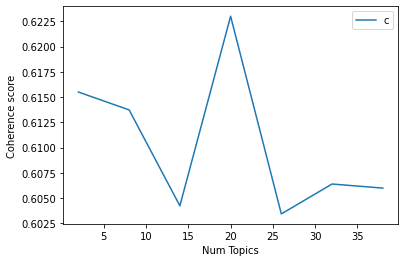

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
      
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, documents)

#5. LDA 학습

In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, id2word=dictionary, num_topics=4)

2021-05-12 17:46:37,828 : INFO : using symmetric alpha at 0.25
2021-05-12 17:46:37,831 : INFO : using symmetric eta at 0.25
2021-05-12 17:46:37,833 : INFO : using serial LDA version on this node
2021-05-12 17:46:37,835 : INFO : running online (single-pass) LDA training, 4 topics, 1 passes over the supplied corpus of 131 documents, updating model once every 131 documents, evaluating perplexity every 131 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-12 17:46:37,838 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-pa

In [ ]:
def get_topic_term_prob(lda_model):
    topic_term_freqs = lda_model.state.get_lambda()
    topic_term_prob = topic_term_freqs / topic_term_freqs.sum(axis=1)[:, None]
    return topic_term_prob

In [ ]:
print(lda_model.alpha.shape) # (n_topics,)
print(lda_model.alpha.sum()) # 1.0

topic_term_prob = get_topic_term_prob(lda_model)
print(topic_term_prob.shape)     # (n_topics, n_terms)
print(topic_term_prob[0].sum())  # 1.0

(4,)
1.0
(4, 25)
1.0000001


In [ ]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

2021-05-12 18:40:52,574 : INFO : topic #0 (0.250): 0.161*"댓글" + 0.159*"개인" + 0.151*"위젯" + 0.112*"지원" + 0.064*"주민번호" + 0.063*"개발" + 0.027*"로그인" + 0.016*"조회" + 0.016*"사용량" + 0.016*"고객"
2021-05-12 18:40:52,580 : INFO : topic #1 (0.250): 0.275*"위젯" + 0.105*"로그인" + 0.094*"고객" + 0.071*"주민번호" + 0.061*"개인" + 0.060*"코알라" + 0.049*"개발자" + 0.048*"아이디" + 0.037*"사랑" + 0.037*"개발"
2021-05-12 18:40:52,584 : INFO : topic #2 (0.250): 0.260*"위젯" + 0.143*"로그인" + 0.093*"사용량" + 0.068*"요금" + 0.067*"조회" + 0.055*"문자" + 0.054*"사용" + 0.029*"댓글" + 0.029*"추가" + 0.029*"실시간"
2021-05-12 18:40:52,589 : INFO : topic #3 (0.250): 0.304*"위젯" + 0.108*"추가" + 0.083*"확인" + 0.059*"통신사" + 0.059*"실시간" + 0.058*"인터넷" + 0.034*"개인" + 0.034*"사용량" + 0.034*"조회" + 0.033*"댓글"


(0, '0.161*"댓글" + 0.159*"개인" + 0.151*"위젯" + 0.112*"지원" + 0.064*"주민번호" + 0.063*"개발" + 0.027*"로그인" + 0.016*"조회" + 0.016*"사용량" + 0.016*"고객"')
(1, '0.275*"위젯" + 0.105*"로그인" + 0.094*"고객" + 0.071*"주민번호" + 0.061*"개인" + 0.060*"코알라" + 0.049*"개발자" + 0.048*"아이디" + 0.037*"사랑" + 0.037*"개발"')
(2, '0.260*"위젯" + 0.143*"로그인" + 0.093*"사용량" + 0.068*"요금" + 0.067*"조회" + 0.055*"문자" + 0.054*"사용" + 0.029*"댓글" + 0.029*"추가" + 0.029*"실시간"')
(3, '0.304*"위젯" + 0.108*"추가" + 0.083*"확인" + 0.059*"통신사" + 0.059*"실시간" + 0.058*"인터넷" + 0.034*"개인" + 0.034*"사용량" + 0.034*"조회" + 0.033*"댓글"')


In [ ]:
for i, topic_list in enumerate(lda_model[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.2689949), (1, 0.06645523), (2, 0.5989696), (3, 0.065580286)]
1 번째 문서의 topic 비율은 [(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]
2 번째 문서의 topic 비율은 [(0, 0.08538706), (1, 0.7473357), (2, 0.0838446), (3, 0.08343269)]
3 번째 문서의 topic 비율은 [(0, 0.08558325), (1, 0.7418537), (2, 0.089023136), (3, 0.08353991)]
4 번째 문서의 topic 비율은 [(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]


In [ ]:
import pandas as pd
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(lda_model, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,2.0,0.5990,"[(0, 0.26901153), (1, 0.06645541), (2, 0.59895..."
1,1,0.0,0.2500,"[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]"
2,2,1.0,0.7473,"[(0, 0.085405275), (1, 0.74731725), (2, 0.0838..."
3,3,1.0,0.7419,"[(0, 0.08558213), (1, 0.74190646), (2, 0.08897..."
4,4,0.0,0.2500,"[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]"
...,...,...,...,...
126,126,2.0,0.6148,"[(0, 0.12560597), (1, 0.13423428), (2, 0.61478..."
127,127,3.0,0.7334,"[(0, 0.08612045), (1, 0.09047707), (2, 0.09002..."
128,128,0.0,0.2500,"[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]"
129,129,0.0,0.2500,"[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]"


In [ ]:
ds.index

Int64Index([ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
            ...
            153, 154, 155, 156, 157, 158, 159, 160, 161, 162],
           dtype='int64', length=131)

#6. 데이터 형식에 맞게 저장하기

처음 한번만 실행

In [ ]:
df = pd.DataFrame(columns=['date', 'label', '클러스터 이름'])

분기별 데이터 불러온 후 df에 하나로 합치기

In [ ]:
original = pd.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/tsv/2011_1.tsv')

print('전체개수, 부정개수, 토픽테이블개수:', len(original), len(original[original.label==0]), len(topictable))

topictable.set_index(original[original.label==0].index, inplace=True)
original.loc[(original.label==0), '클러스터 이름'] = topictable['가장 비중이 높은 토픽']
original.drop(['text'], axis=1, inplace=True)

# 분기별 데이터 합치기
df = pd.concat([df, original])

전체개수, 부정개수, 토픽테이블개수: 163 131 131


데이터 저장

In [ ]:
df.to_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/visualization/data_one/final_data1.csv', index=False)

#7. 그래프 시각화

In [ ]:
import pyLDAvis.gensim as gensimvis

prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)

In [ ]:
import pyLDAvis

pyLDAvis.display(prepared_data)

In [ ]:
from sklearn.decomposition import PCA
topic_vector = lda_model.expElogbeta
y = PCA(n_components=2).fit_transform(topic_vector)

print('{} -> {}'.format(topic_vector.shape, y.shape))
# (n_topics, n_terms) -> (n_topics, 2)

(4, 25) -> (4, 2)


#8. 한번에 전 과정 실행하기

In [8]:
!pip install pyLDAvis==3.2.2

     |████████████████████████████████| 1.7MB 6.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=a0a57d275d48e2af336f0951e5fc3dbb3f48d5db3d1bf5a66ac4af7cf43263db
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [9]:
import gensim
from collections import Counter
import pandas as pd
import numpy as np
#from konlpy.tag import Mecab 
from tqdm import tqdm 
import re 
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pickle 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt
import pyLDAvis.gensim as gensimvis
import pyLDAvis
import math



class Documents:
    def __init__(self, path):
        self.path = path
    def __iter__(self):
        with open(self.path, encoding='utf-8') as f:
            for doc in f:
                yield doc.strip().split()

class Corpus:
    def __init__(self, path, dictionary):
        self.path = path
        self.dictionary = dictionary
        self.length = 0
    def __iter__(self):
        with open(self.path, encoding='utf-8') as f:
            for doc in f:
                yield self.dictionary.doc2bow(doc.split())
    def __len__(self):
        if self.length == 0:
            with open(self.path, encoding='utf-8') as f:
                for i, doc in enumerate(f):
                    continue
            self.length = i + 1
        return self.length


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
  """ Compute c_v coherence for various number of topics 
  Parameters: 
  ---------- 
  dictionary : Gensim dictionary 
  corpus : Gensim corpus 
  texts : List of input texts 
  limit : Max num of topics 

  Returns: 
  ------- 
  model_list : List of LDA topic models 
  coherence_values : Coherence values corresponding to the LDA model with respective number of topics 
  """ 
  coherence_values = [] 
  model_list = [] 
  for num_topics in range(start, limit, step): 
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics) 
    model_list.append(model) 
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
    coherence_values.append(coherencemodel.get_coherence()) 

  return model_list, coherence_values 
  
def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
  limit = 40; 
  start = 2; 
  step = 6;

  model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step) 
    
  x = range(start, limit, step) 
  plt.plot(x, coherence_values) 
  plt.xlabel("Num Topics") 
  plt.ylabel("Coherence score") 
  plt.legend(("coherence_values"), loc='best') 
  plt.show() 

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


한번만 실행

In [ ]:
#0. output 데이터프레임 생성

output = pd.DataFrame(columns=['date', 'label', '클러스터 이름'])
output2 = pd.DataFrame(columns = ['분기', '클러스터 이름' , '등장 빈도가 높은 단어'])
output3 = pd.DataFrame(columns= ['date', 'text', 'label', '클러스터 이름'])

그 이후의 실행

In [ ]:
output = pd.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/visualization/data_one/final_data_1.csv')
output2 = pd.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/visualization/data_one/final_data_2.csv')
output3 = pd.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/visualization/data_one/final_data_3.csv')

In [ ]:
output

,date,label,클러스터 이름
0,2016년 2월 15일,2,NaN
1,2016년 3월 1일,2,NaN
2,2016년 2월 24일,1,NaN
3,2016년 3월 20일,2,NaN
4,2016년 2월 15일,1,NaN
...,...,...,...
7073,2020년 11월 7일,0,서비스
7074,2020년 11월 16일,0,업데이트 오류
7075,2020년 10월 9일,0,서비스
7076,2020년 10월 3일,0,서비스


분기별로 계속 실행

In [14]:
#1. document 생성

file_name = '2020_4'
original = pd.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/tsv/'+file_name+'.tsv')
corpus_path = '/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/tokenized_data/tokenizing_'+file_name+'.txt'
documents = Documents(corpus_path)

#2. dictionary 생성

dictionary = gensim.corpora.Dictionary(documents)
print('dictionary size : %d' % len(dictionary))

#3. min count 설정 후 dictionary 축소
min_count = 6
word_counter = Counter((word for words in documents for word in words))
removal_word_idxs = {
    dictionary.token2id[word] for word, count in word_counter.items() if count < min_count
}

dictionary.filter_tokens(removal_word_idxs)
dictionary.compactify()
print('dictionary size : %d' % len(dictionary))

#4. 불용어 처리

df_dictionary = pd.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/rsc/clustering_data/service_center/stop_word_dictionary.tsv', sep='\t', header=None) #tsv파일이 불용어 사전
stop_word = list(np.array(df_dictionary[0].tolist()))

dict_list = list(dictionary.values())
removal_word_idxs2 = {
    dictionary.token2id[word] for word in dict_list
    if word in stop_word
}

dictionary.filter_tokens(removal_word_idxs2)
dictionary.compactify()
print('dictionary size : %d' % len(dictionary))

#5. corpus 생성

corpus = Corpus(corpus_path, dictionary)

dictionary size : 882
dictionary size : 115
dictionary size : 33


2021-05-16 10:09:29,761 : INFO : using symmetric alpha at 0.5
2021-05-16 10:09:29,764 : INFO : using symmetric eta at 0.5
2021-05-16 10:09:29,766 : INFO : using serial LDA version on this node
2021-05-16 10:09:29,776 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 145 documents, updating model once every 145 documents, evaluating perplexity every 145 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-16 10:09:29,778 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-pack

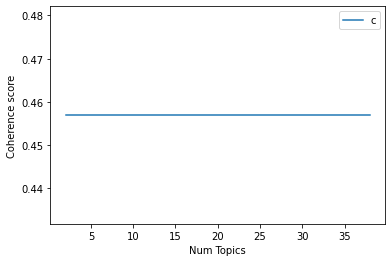

In [ ]:
#6. 최적의 토픽 수 찾기

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)  
find_optimal_number_of_topics(dictionary, corpus, documents)

In [15]:
#7. LDA 학습

n_topics = 7

lda_model = LdaModel(corpus, id2word=dictionary, num_topics=n_topics)
topics = lda_model.print_topics(num_words=10)

prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(prepared_data)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
 len(original[original.label==0])
#print(original)

131

In [ ]:
original = pd.read_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/data_quarter/tsv/'+file_name+'.tsv')

In [ ]:
#8. 시각화팀이 원하는 데이터 2

df_two = pd.DataFrame(columns = ['분기', '클러스터 이름' , '등장 빈도가 높은 단어'])
date = corpus_path[92:96] + '년 ' + corpus_path[97] + '분기'
clu_name = corpus_path[92:96] + '_' + corpus_path[97] + '_'

for i in range(len(topics)):
  top = lda_model.show_topic(i)
  for j in range(10):
    fre = round(top[j][1] * 100)
    df_plus = pd.DataFrame({'분기':[date]*fre,
                            '클러스터 이름':[clu_name + str(i)]*fre,
                            '등장 빈도가 높은 단어':[top[j][0]]*fre})
    df_two = pd.concat([df_two, df_plus], ignore_index=False)

#9. topictable 생성

topictable = make_topictable_per_doc(lda_model, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']

#10. 데이터 형식에 맞게 저장

#print('전체개수, 부정개수, 토픽테이블개수:', len(original), len(original[original.label==0]), len(topictable))

topictable.set_index(original[original.label==0].index, inplace=True)
original.loc[(original.label==0), '클러스터 이름'] = topictable['가장 비중이 높은 토픽']
for i in range(len(original)):
  if math.isnan(original.loc[i, '클러스터 이름']) == False:
    original.loc[i, '클러스터 이름'] = clu_name + str(int(original.loc[i, '클러스터 이름'])) 

output3 = pd.concat([output3, original])

original.drop(['text'], axis=1, inplace=True)

#11. 분기별 데이터 합치기
output = pd.concat([output, original])
output2 = pd.concat([output2, df_two], ignore_index=False)

print(file_name, '완료')

2021_1 완료


In [ ]:

output.reset_index(inplace=True, drop=True)
output2.reset_index(inplace=True, drop=True)
output3.reset_index(inplace=True, drop=True)

In [ ]:
output

,date,label,클러스터 이름
0,2016년 2월 15일,2,NaN
1,2016년 3월 1일,2,NaN
2,2016년 2월 24일,1,NaN
3,2016년 3월 20일,2,NaN
4,2016년 2월 15일,1,NaN
...,...,...,...
7292,2021년 2월 11일,0,2021_1_0
7293,2021년 3월 12일,0,2021_1_5
7294,2021년 3월 13일,0,2021_1_5
7295,2021년 2월 14일,0,2021_1_0


In [ ]:
output2

,분기,클러스터 이름,등장 빈도가 높은 단어
0,2016년 1분기,위젯,위젯
1,2016년 1분기,위젯,위젯
2,2016년 1분기,위젯,위젯
3,2016년 1분기,위젯,위젯
4,2016년 1분기,위젯,위젯
...,...,...,...
10954,2021년 1분기,2021_1_6,속도
10955,2021년 1분기,2021_1_6,속도
10956,2021년 1분기,2021_1_6,업데이트
10957,2021년 1분기,2021_1_6,로그인


In [ ]:
output3

,date,text,label,클러스터 이름
0,2016년 2월 15일,헬로마켓 5000원적립이벤트 알고계신가요~~? 너무좋아요ㅠㅠ 이것저것 살것두많구 모...,2,NaN
1,2016년 3월 1일,조금 주는게 아니라 요금제가 다른거겠죠.,2,NaN
2,2016년 2월 24일,중요한 정보는 다 들어잇어서 딱히 불편한게 없어요,1,NaN
3,2016년 3월 20일,데이터 조금준다는 사람은 뭡니까 자신이 요금제를 싼걸 했나부지 하면되는걸...,2,NaN
4,2016년 2월 15일,불평 줜나게 많네 걍 써라,1,NaN
...,...,...,...,...
7292,2021년 2월 11일,좋음,0,2021_1_0
7293,2021년 3월 12일,070전화불편,0,2021_1_5
7294,2021년 3월 13일,업데이트 겁나 자주해요ㅠ😭😭😭😭😭😭😭😭,0,2021_1_5
7295,2021년 2월 14일,좋음,0,2021_1_0


In [ ]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(prepared_data)

In [ ]:
topic = 7
lda_model.show_topic(topic)

IndexError: ignored

In [ ]:
name = '전화 상담'
output.loc[(output['클러스터 이름'] == clu_name + str(topic)), '클러스터 이름'] = name
output2.loc[(output2['클러스터 이름'] == clu_name + str(topic)), '클러스터 이름'] = name
output3.loc[(output3['클러스터 이름'] == clu_name + str(topic)), '클러스터 이름'] = name
output

,date,label,클러스터 이름
0,2016년 2월 15일,2,NaN
1,2016년 3월 1일,2,NaN
2,2016년 2월 24일,1,NaN
3,2016년 3월 20일,2,NaN
4,2016년 2월 15일,1,NaN
...,...,...,...
7292,2021년 2월 11일,0,로그인 오류
7293,2021년 3월 12일,0,전화 상담
7294,2021년 3월 13일,0,전화 상담
7295,2021년 2월 14일,0,로그인 오류


In [ ]:
# 특정 빈도 단어 삭제
idx = output2[(output2['클러스터 이름'] == name) & (output2['등장 빈도가 높은 단어'] == '업데이트')].index
output2.drop(idx, inplace=True)
output2.reset_index(inplace=True, drop=True)
output2

,분기,클러스터 이름,등장 빈도가 높은 단어
0,2016년 1분기,위젯,위젯
1,2016년 1분기,위젯,위젯
2,2016년 1분기,위젯,위젯
3,2016년 1분기,위젯,위젯
4,2016년 1분기,위젯,위젯
...,...,...,...
10361,2020년 4분기,2020_4_5,업데이트
10362,2020년 4분기,2020_4_5,업데이트
10363,2020년 4분기,2020_4_5,답변
10364,2020년 4분기,2020_4_5,답변


In [ ]:
#클러스터 합칠 때만
idx = output2[output2['클러스터 이름'] == clu_name + str(topic)].index
output2.drop(idx, inplace=True)
output2.reset_index(inplace=True, drop=True)

name = '접속 오류'
output.loc[(output['클러스터 이름'] == clu_name + str(topic)), '클러스터 이름'] = name
output3.loc[(output3['클러스터 이름'] == clu_name + str(topic)), '클러스터 이름'] = name
output

,date,label,클러스터 이름
0,2016년 2월 15일,2,NaN
1,2016년 3월 1일,2,NaN
2,2016년 2월 24일,1,NaN
3,2016년 3월 20일,2,NaN
4,2016년 2월 15일,1,NaN
...,...,...,...
7292,2021년 2월 11일,0,로그인 오류
7293,2021년 3월 12일,0,전화 상담
7294,2021년 3월 13일,0,전화 상담
7295,2021년 2월 14일,0,로그인 오류


In [ ]:
output

,date,label,클러스터 이름
0,2016년 2월 15일,2,NaN
1,2016년 3월 1일,2,NaN
2,2016년 2월 24일,1,NaN
3,2016년 3월 20일,2,NaN
4,2016년 2월 15일,1,NaN
...,...,...,...
7292,2021년 2월 11일,0,로그인 오류
7293,2021년 3월 12일,0,전화 상담
7294,2021년 3월 13일,0,전화 상담
7295,2021년 2월 14일,0,로그인 오류


In [ ]:

output2

,분기,클러스터 이름,등장 빈도가 높은 단어
0,2016년 1분기,위젯,위젯
1,2016년 1분기,위젯,위젯
2,2016년 1분기,위젯,위젯
3,2016년 1분기,위젯,위젯
4,2016년 1분기,위젯,위젯
...,...,...,...
10855,2021년 1분기,전화 상담,삭제
10856,2021년 1분기,전화 상담,삭제
10857,2021년 1분기,전화 상담,요금
10858,2021년 1분기,전화 상담,요금


In [ ]:
output3

,date,text,label,클러스터 이름
0,2016년 2월 15일,헬로마켓 5000원적립이벤트 알고계신가요~~? 너무좋아요ㅠㅠ 이것저것 살것두많구 모...,2,NaN
1,2016년 3월 1일,조금 주는게 아니라 요금제가 다른거겠죠.,2,NaN
2,2016년 2월 24일,중요한 정보는 다 들어잇어서 딱히 불편한게 없어요,1,NaN
3,2016년 3월 20일,데이터 조금준다는 사람은 뭡니까 자신이 요금제를 싼걸 했나부지 하면되는걸...,2,NaN
4,2016년 2월 15일,불평 줜나게 많네 걍 써라,1,NaN
...,...,...,...,...
7292,2021년 2월 11일,좋음,0,로그인 오류
7293,2021년 3월 12일,070전화불편,0,전화 상담
7294,2021년 3월 13일,업데이트 겁나 자주해요ㅠ😭😭😭😭😭😭😭😭,0,전화 상담
7295,2021년 2월 14일,좋음,0,로그인 오류


In [ ]:
# name1 = '안드로이드'
# name2 = '유심 인식 오류'
# output.loc[(output['클러스터 이름'] == name1), '클러스터 이름'] = name2
# output2.loc[(output2['클러스터 이름'] == name1), '클러스터 이름'] = name2
# output3.loc[(output3['클러스터 이름'] == name1), '클러스터 이름'] = name2

In [ ]:
#output2[(output2['클러스터 이름'] == name1)] 

,분기,클러스터 이름,등장 빈도가 높은 단어


최종 한번만 실행

In [ ]:
#11. 최종 output 저장
output.to_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/visualization/data_one/final_data_1.csv', index=False)
output2.to_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/visualization/data_one/final_data_2.csv', index=False)
output3.to_csv('/content/drive/Shareddrives/capstone/Elegant_Friends/visualization/data_one/final_data_3.csv', index=False)

In [ ]:
output

,date,label,클러스터 이름
0,2016년 2월 15일,2,NaN
1,2016년 3월 1일,2,NaN
2,2016년 2월 24일,1,NaN
3,2016년 3월 20일,2,NaN
4,2016년 2월 15일,1,NaN
...,...,...,...
7292,2021년 2월 11일,0,로그인 오류
7293,2021년 3월 12일,0,전화 상담
7294,2021년 3월 13일,0,전화 상담
7295,2021년 2월 14일,0,로그인 오류


In [ ]:
output2

,분기,클러스터 이름,등장 빈도가 높은 단어
0,2016년 1분기,위젯,위젯
1,2016년 1분기,위젯,위젯
2,2016년 1분기,위젯,위젯
3,2016년 1분기,위젯,위젯
4,2016년 1분기,위젯,위젯
...,...,...,...
10827,2021년 1분기,전화 상담,삭제
10828,2021년 1분기,전화 상담,삭제
10829,2021년 1분기,전화 상담,요금
10830,2021년 1분기,전화 상담,요금


In [ ]:
output3

,date,text,label,클러스터 이름
0,2016년 2월 15일,헬로마켓 5000원적립이벤트 알고계신가요~~? 너무좋아요ㅠㅠ 이것저것 살것두많구 모...,2,NaN
1,2016년 3월 1일,조금 주는게 아니라 요금제가 다른거겠죠.,2,NaN
2,2016년 2월 24일,중요한 정보는 다 들어잇어서 딱히 불편한게 없어요,1,NaN
3,2016년 3월 20일,데이터 조금준다는 사람은 뭡니까 자신이 요금제를 싼걸 했나부지 하면되는걸...,2,NaN
4,2016년 2월 15일,불평 줜나게 많네 걍 써라,1,NaN
...,...,...,...,...
7292,2021년 2월 11일,좋음,0,로그인 오류
7293,2021년 3월 12일,070전화불편,0,전화 상담
7294,2021년 3월 13일,업데이트 겁나 자주해요ㅠ😭😭😭😭😭😭😭😭,0,전화 상담
7295,2021년 2월 14일,좋음,0,로그인 오류
